import libraries

In [ ]:
import pandas as pd # 数据处理库
import numpy as np # 数组/向量库
import matplotlib.pyplot as plt # 画图库
import seaborn as sns # 画图库
import nltk # NLP库
nltk.download('punkt') # nltk数据源

from nltk.tokenize import word_tokenize # 分词
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences # 向量补齐
from keras.models import Sequential # 一种序列化的数据格式
from keras.layers import Embedding, LSTM, Dense, Dropout #embedding其实就是个映射，文本数据域指向数值域；长短期记忆人工神经网络；全连接层；丢弃数据
from sklearn.preprocessing import LabelEncoder

import warnings # 避免warning
warnings.filterwarnings('ignore')
sns.set()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


importing files

In [ ]:
from google.colab import drive # google云盘导入
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing data

In [ ]:
imdb_train = pd.read_csv('/content/drive/My Drive/blog_train.csv') # 读入训练集
imdb_train.head()
imdb_test = pd.read_csv('/content/drive/My Drive/blog_test.csv') # 读入测试集

relatively balanced dataset

In [ ]:
imdb_train.label.value_counts() # 平衡数据集

1    3625
0    2752
Name: label, dtype: int64

tokenizer demo

In [ ]:
text = imdb_train['sentence'][0]
print(text) 
print(word_tokenize(text)) # 分词的演示

besides that stupid Brokeback Mountain crap)..
['besides', 'that', 'stupid', 'Brokeback', 'Mountain', 'crap', ')', '..']


In [ ]:
corpus = []
for text in imdb_train['sentence']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words) # 变小写 

In [ ]:
num_words = len(corpus) # 获取长度
print(num_words)

6377


In [ ]:
imdb_train.shape # 向量 6377 * 2

(6377, 2)

In [ ]:
X_train = imdb_train.sentence # 训练数据集输入
y_train = imdb_train.label # 训练数据集输出
X_test = imdb_test.sentence # 测试数据集输入
y_test = imdb_test.label # 测试数据集输出

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
tokenizer = Tokenizer(num_words) # 创建分词对象
tokenizer.fit_on_texts(X_train) # 训练
type(X_train)

pandas.core.series.Series

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train) # 文本转为序列
type(X_train)

list

In [ ]:
X_train = pad_sequences(X_train, maxlen = 32, truncating = 'post', padding= 'post') # padding补齐到32个token
type(X_train)

numpy.ndarray

In [ ]:
X_train[0], len(X_train[0]) # 示例

(array([482,  22,  32,   9,  10, 436,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0], dtype=int32), 32)

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test) # 同上，测试集
X_test = pad_sequences(X_test, maxlen = 32, truncating ='post', padding= 'post')

In [ ]:
X_test[10], len(X_test[0]) # 示例

(array([  5,   4, 206, 207, 208, 141, 183, 209,  36, 192,  66, 210,   3,
         25, 170,  49,  66, 211,  38, 212, 158, 213, 214,   3, 215,   3,
        216, 151,   2, 217, 218, 159], dtype=int32), 32)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) # 向量形状 ，后面没写就是1

(6377, 32) (6377,)
(709, 32) (709,)


In [ ]:
le = LabelEncoder() # 对分类型特征值进行编码，即对不连续的数值或文本进行编码
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Model

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 100,
          input_length = 32, trainable = True)) # 词向量映射，6377到100维
model.add(LSTM(100, dropout = 0.1, return_sequences = True)) # LSTM 输入100维，扔掉0.1的数据，防止过拟合
model.add(LSTM(100, dropout = 0.1)) # 同上
model.add(Dense(1, activation = 'sigmoid')) # 输出1维，类别变量，sigmoid作为激活函数

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # 交叉熵损失，adam优化器，获取accuracy

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, shuffle = True, batch_size = 64, validation_data = (X_test, y_test)) # 训练

Epoch 1/20
100/100 [==============================] - 9s 17ms/step - loss: 0.2303 - accuracy: 0.8821 - val_loss: 0.0703 - val_accuracy: 0.9760
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0667 - val_accuracy: 0.9831
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.0456 - val_accuracy: 0.9901
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.1169 - val_accuracy: 0.9817
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 2.0861e-04 - accuracy: 1.0000 - val_loss: 0.1318 - val_accuracy: 0.9817
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 7.7823e-05 - accuracy: 1.0000 - val_loss: 0.1533 - val_accuracy: 0.9803
Epoch 7/20
100/100 [==============================] - 1s 9ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.1390 - val_accuracy: 0.97

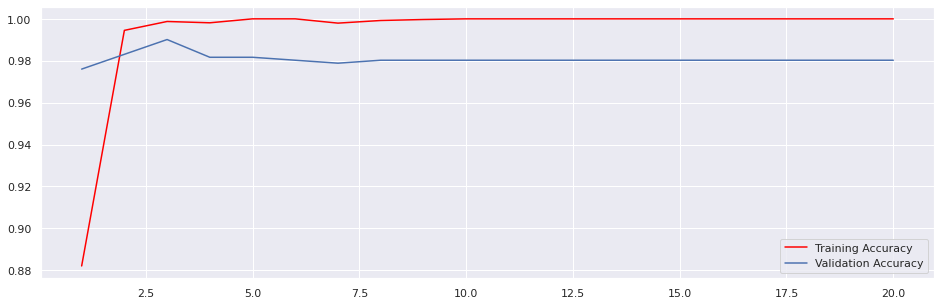

In [ ]:
plt.figure(figsize=(16,5)) # 图
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label = 'Training Accuracy', color ='red')
plt.plot(epochs, history.history['val_accuracy'], 'b' ,label ='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
validation_sentence = ['A film without love and beauty, but shining'] # 测试句子
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence) # 文本转化为序列
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen = 32, truncating = 'post', padding= 'post') # padding补齐

print(validation_sentence[0])
print("Probability of Positive:{}".format(model.predict(validation_sentence_padded)[0])) # 预测积极概率

A film without love and beauty, but shining
Probability of Positive:[0.99999464]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-dmwzh2bt
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-dmwzh2bt
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=1b89e919e72ac5389a4e558507482d6c74e93ea80a6cbb5a8b61952a7c02d0e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-cclowuyo/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re 

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
X_train = imdb_train.sentence
y_train = imdb_train.label
X_test = imdb_test.sentence
y_test = imdb_test.label

In [ ]:
X_train = X_train.apply(lambda x: get_clean(x))
X_test = X_test.apply(lambda x: get_clean(x))

In [ ]:
tfidf = TfidfVectorizer(max_features = 675)

In [ ]:
X_train = tfidf.fit_transform(X_train) 
X_test = tfidf.fit_transform(X_test) 

In [ ]:
X_train

<6377x675 sparse matrix of type '<class 'numpy.float64'>'
	with 58066 stored elements in Compressed Sparse Row format>

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.59      0.56       339
           1       0.58      0.51      0.54       370

    accuracy                           0.55       709
   macro avg       0.55      0.55      0.55       709
weighted avg       0.55      0.55      0.55       709



In [ ]:
x = 'A film without love and beauty, but shining'

x = get_clean(x)
vec = tfidf.transform([x])

In [ ]:
clf.predict(vec)

array([0])

In [ ]:
douban = pd.read_csv('/content/drive/My Drive/chinese.csv')

In [ ]:
douban['label'] = douban['label'].str.replace(r'[^0-9]', '')

In [ ]:
douban.label.value_counts()

1          26255
0          25497
              27
9              1
1996           1
0117500        1
Name: label, dtype: int64

In [ ]:
douban

,label,sentence
0,1,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
1,1,不需要女主角的好电影
2,1,恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》
3,1,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...
4,1,策划了19年的私奔……
...,...,...
51786,1,好啊，我在想如果最后那颗误投的炸弹将他们炸死，这部电影又会是什么样子？
51787,1,重温经典。跌宕起伏的情节永远有再看一遍的冲动，美国政府的抉择，孤胆英雄的呐喊，多向冲突共同架...
51788,1,因为这部影片，开始喜欢Cage到现在。
51789,1,忘掉剧情吧~四颗星向伟大的汉斯季末，肖恩康纳利致敬！伟大的原声！其实凯奇和哈里斯也不错~


In [ ]:
douban = douban.drop(douban[(douban['label'] == '') | (douban['label'] == '9')| (douban['label'] == '1996')| (douban['label'] == '0117500')].index)
douban

,label,sentence
0,1,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
1,1,不需要女主角的好电影
2,1,恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》
3,1,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...
4,1,策划了19年的私奔……
...,...,...
51786,1,好啊，我在想如果最后那颗误投的炸弹将他们炸死，这部电影又会是什么样子？
51787,1,重温经典。跌宕起伏的情节永远有再看一遍的冲动，美国政府的抉择，孤胆英雄的呐喊，多向冲突共同架...
51788,1,因为这部影片，开始喜欢Cage到现在。
51789,1,忘掉剧情吧~四颗星向伟大的汉斯季末，肖恩康纳利致敬！伟大的原声！其实凯奇和哈里斯也不错~


In [ ]:
douban.label.value_counts()

1    26255
0    25497
Name: label, dtype: int64

In [ ]:
import jieba
douban['sentence'] = douban['sentence'].astype(str)
douban['sentence'] = douban.sentence.apply(lambda x: " ".join(jieba.cut(x)))
douban

,label,sentence
0,1,当年 的 奥斯卡 颁奖礼 上 ， 被 如日中天 的 《 阿甘正传 》 掩盖 了 它 的 光彩...
1,1,不 需要 女主角 的 好 电影
2,1,恐惧 让 你 沦为 囚犯 ， 希望 让 你 重获 自由 。 — — 《 肖申克 的 救赎 》
3,1,“ 这是 一部 男人 必看 的 电影 。 ” 人人 都 这么 说 。 但 单纯 从 性别 区...
4,1,策划 了 19 年 的 私奔 … …
...,...,...
51786,1,好 啊 ， 我 在 想 如果 最后 那颗 误 投 的 炸弹 将 他们 炸死 ， 这部 电影 ...
51787,1,重温 经典 。 跌宕起伏 的 情节 永远 有 再 看一遍 的 冲动 ， 美国政府 的 抉择 ...
51788,1,因为 这部 影片 ， 开始 喜欢 Cage 到 现在 。
51789,1,忘掉 剧情 吧 ~ 四颗星 向 伟大 的 汉斯 季末 ， 肖恩 康纳利 致敬 ！ 伟大 的 ...


In [ ]:
import re
pattern = re.compile(r'[\u4e00-\u9fa5]+')
clean_data = []
for i, data in enumerate(douban['sentence']) :
  temp = re.compile(u'[\u4E00-\u9FA5|\s\w]').findall(data)
  datatemp1 = ''.join(temp)
  #datatemp2 = datatemp1.replace(' ', '')
  datatemp2 = datatemp1.lstrip()
  data = datatemp2.rstrip()
  douban['sentence'][i] = data
  
douban

#  data = re.findall(pattern, data)
#  data = ''.join(data)

#douban['comment'] = re.findall(pattern, douban['comment'])

,label,sentence
0,1,当年 的 奥斯卡 颁奖礼 上 被 如日中天 的 阿甘正传 掩盖 了 它 的 光彩 而...
1,1,不 需要 女主角 的 好 电影
2,1,恐惧 让 你 沦为 囚犯 希望 让 你 重获 自由 肖申克 的 救赎
3,1,这是 一部 男人 必看 的 电影 人人 都 这么 说 但 单纯 从 性别 区分 就 ...
4,1,策划 了 19 年 的 私奔
...,...,...
51786,1,好 啊 ， 我 在 想 如果 最后 那颗 误 投 的 炸弹 将 他们 炸死 ， 这部 电影 ...
51787,1,重温 经典 。 跌宕起伏 的 情节 永远 有 再 看一遍 的 冲动 ， 美国政府 的 抉择 ...
51788,1,因为 这部 影片 ， 开始 喜欢 Cage 到 现在 。
51789,1,忘掉 剧情 吧 ~ 四颗星 向 伟大 的 汉斯 季末 ， 肖恩 康纳利 致敬 ！ 伟大 的 ...


In [ ]:
douban = douban[0:50000]
douban

,label,sentence
0,1,当年 的 奥斯卡 颁奖礼 上 被 如日中天 的 阿甘正传 掩盖 了 它 的 光彩 而...
1,1,不 需要 女主角 的 好 电影
2,1,恐惧 让 你 沦为 囚犯 希望 让 你 重获 自由 肖申克 的 救赎
3,1,这是 一部 男人 必看 的 电影 人人 都 这么 说 但 单纯 从 性别 区分 就 ...
4,1,策划 了 19 年 的 私奔
...,...,...
49995,0,韩国 人真 不会 拍电影 只 知道 一味 煽情
49996,0,这么 假
49997,0,韩国 文艺 产品 离得开 绝症 吗
49998,0,导演 执行力 太 差


In [ ]:
corpus = []
for text in douban['sentence']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words) # 变小写 

In [ ]:
num_words = len(corpus) # 获取长度
print(num_words)

50000


In [ ]:
X_train = [str(a) for a in douban.sentence[0:40000].tolist()]

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train[0]

[454,
 1,
 374,
 30127,
 46,
 28,
 21393,
 1,
 3102,
 1975,
 2,
 89,
 1,
 8384,
 58,
 1642,
 217,
 1,
 21394,
 48,
 6,
 9,
 666,
 56,
 1,
 398,
 636,
 1,
 1976,
 538,
 731,
 2,
 785,
 5320,
 227,
 1317,
 4,
 9130,
 57,
 1091,
 7797,
 11062,
 7310,
 8371,
 15,
 7798,
 578,
 4038,
 313,
 12445,
 305,
 3026,
 1,
 6,
 30128,
 3434,
 65,
 375,
 3103,
 14,
 1,
 12,
 1,
 9131,
 3,
 141,
 1860,
 448,
 85,
 46,
 43,
 476,
 1,
 12446,
 11,
 166,
 4506,
 144,
 239,
 23,
 12447]

In [ ]:
X_train = pad_sequences(X_train, maxlen = 64, truncating = 'post', padding= 'post') # padding补齐到128个token

In [ ]:
print(X_train[0])

[  454     1   374 30127    46    28 21393     1  3102  1975     2    89
     1  8384    58  1642   217     1 21394    48     6     9   666    56
     1   398   636     1  1976   538   731     2   785  5320   227  1317
     4  9130    57  1091  7797 11062  7310  8371    15  7798   578  4038
   313 12445   305  3026     1     6 30128  3434    65   375  3103    14
     1    12     1  9131]


In [ ]:
X_test = [str(a) for a in douban.sentence[40000:50000].tolist()]
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = 64, truncating = 'post', padding= 'post') # padding补齐到128个token

In [ ]:
print(X_train.shape, X_test.shape)

(40000, 64) (10000, 64)


In [ ]:
le = LabelEncoder() # 对分类型特征值进行编码，即对不连续的数值或文本进行编码
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 200,
          input_length = 64, trainable = True)) # 
model.add(LSTM(200, dropout = 0.1, return_sequences = True)) # LSTM 输入100维，扔掉0.1的数据，防止过拟合
model.add(LSTM(200, dropout = 0.1)) # 同上
model.add(Dense(1, activation = 'sigmoid')) # 输出1维，类别变量，sigmoid作为激活函数

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # 交叉熵损失，adam优化器，获取accuracy

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, shuffle = True, batch_size = 200, validation_data = (X_test, y_test)) # 训练

Epoch 1/20
200/200 [==============================] - 10s 39ms/step - loss: 0.6023 - accuracy: 0.6970 - val_loss: 0.6111 - val_accuracy: 0.6806
Epoch 2/20
200/200 [==============================] - 7s 34ms/step - loss: 0.5865 - accuracy: 0.6945 - val_loss: 0.5964 - val_accuracy: 0.7011
Epoch 3/20
200/200 [==============================] - 7s 36ms/step - loss: 0.5563 - accuracy: 0.7357 - val_loss: 0.5875 - val_accuracy: 0.7290
Epoch 4/20
200/200 [==============================] - 7s 36ms/step - loss: 0.5127 - accuracy: 0.7855 - val_loss: 0.5623 - val_accuracy: 0.7468
Epoch 5/20
200/200 [==============================] - 7s 36ms/step - loss: 0.4851 - accuracy: 0.7922 - val_loss: 0.6357 - val_accuracy: 0.6801
Epoch 6/20
200/200 [==============================] - 7s 36ms/step - loss: 0.5074 - accuracy: 0.7660 - val_loss: 0.6204 - val_accuracy: 0.6725
Epoch 7/20
200/200 [==============================] - 7s 35ms/step - loss: 0.4781 - accuracy: 0.7776 - val_loss: 0.6157 - val_accuracy: 0.685

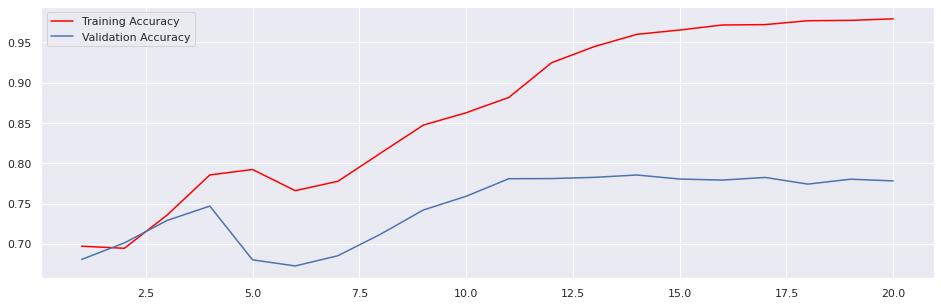

In [ ]:
plt.figure(figsize=(16,5)) # 图
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label = 'Training Accuracy', color ='red')
plt.plot(epochs, history.history['val_accuracy'], 'b' ,label ='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
tfidf = TfidfVectorizer(max_features = 10000)

In [ ]:
X_train = douban.sentence[0:40000]
X_test = douban.sentence[40000:50000]
X_train = tfidf.fit_transform(X_train) 
X_test = tfidf.fit_transform(X_test) 

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      4832
           1       0.54      0.67      0.60      5168

    accuracy                           0.54     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.54      0.53     10000

